In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from my_scripts.stat_model_train import recursive_forc_ar
from my_scripts.stat_model_train import recursive_forc_mean
from my_scripts.stat_model_train import recursive_forc_last
from sklearn.metrics import mean_absolute_error

In [28]:
# Generating an autoregressive model
np.random.seed(144)

ma2 = [1, 0 , 0]
ar2 = [1, -0.33, -0.50]

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

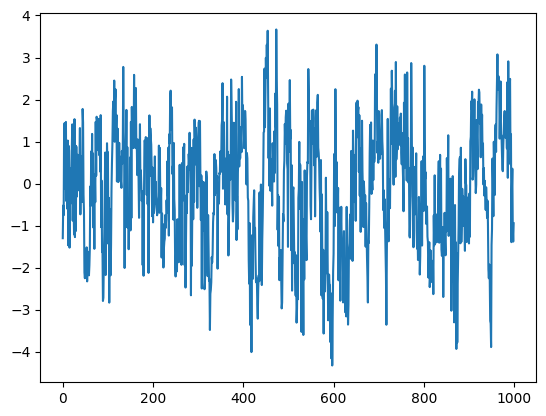

In [29]:
fig, ax = plt.subplots()
ax.plot(AR2_process)

In [30]:
adfuller(AR2_process)[0:2] # Stationary

(-8.220902662044676, 6.433901056836108e-13)

Figure(640x480)


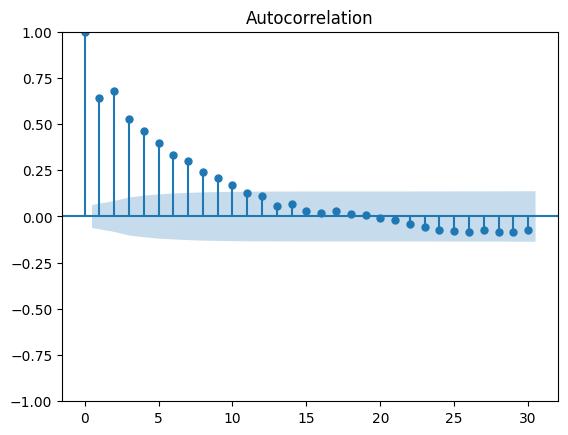

In [31]:
print(plot_acf(AR2_process))

Figure(640x480)


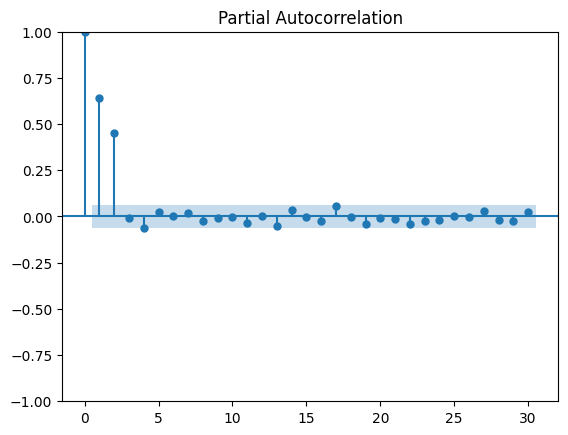

In [32]:
print(plot_pacf(AR2_process))

In [33]:
df = pd.DataFrame({"Value" : AR2_process})

train = df[:800]
test = df[800:]

In [34]:
f_last = recursive_forc_last(df,
                             len(train),
                             200,
                             window = 2)

In [35]:
f_mean = recursive_forc_mean(df,
                             len(train),
                             200,
                             window = 2)

In [36]:
f_ar = recursive_forc_ar(df,
                             len(train),
                             200,
                             window = 2)

In [37]:
test.loc[:, "lastvalue"] = f_last
test.loc[:, "means"] = f_mean
test.loc[:, "ar"] = f_ar

C:\Users\User\AppData\Local\Temp\ipykernel_49324\3531092851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "lastvalue"] = f_last
C:\Users\User\AppData\Local\Temp\ipykernel_49324\3531092851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "means"] = f_mean
C:\Users\User\AppData\Local\Temp\ipykernel_49324\3531092851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

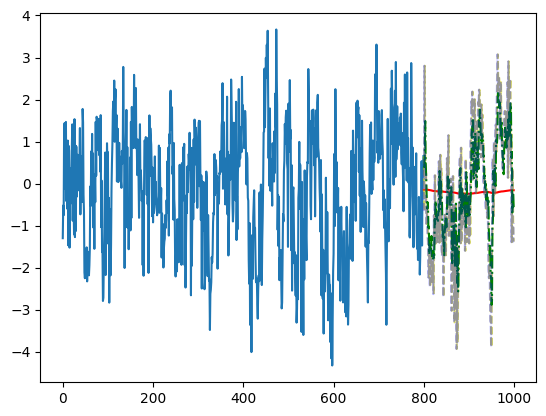

In [38]:
fig, ax = plt.subplots()
ax.plot(train["Value"])

ax.plot(test["means"], "r-")
ax.plot(test["lastvalue"], "y--", alpha = 0.6)
ax.plot(test["ar"], "g-.")

ax.plot(test["Value"], "b--", alpha = 0.3)

In [39]:
mae_last = mean_absolute_error(test["Value"], test["lastvalue"])
mae_mean = mean_absolute_error(test["Value"], test["means"])
mae_ar = mean_absolute_error(test["Value"], test["ar"])

print(f"\
      Last value {mae_last}\
      Means {mae_mean}\
      AR {mae_ar}\
      ")

      Last value 0.8745138108241949      Means 1.2363047250957697      AR 0.7838015506851085      
